In [1]:
!pip install top2vec

     |████████████████████████████████| 15.3MB 393kB/s 
     |████████████████████████████████| 6.4MB 37.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311690 sha256=0946aee91c07f54ba79210661f03bd36f430c744687a854ff960895815b84553
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [7]:
!pip install top2vec[sentence_transformers]

     |████████████████████████████████| 81kB 4.8MB/s 
     |████████████████████████████████| 2.0MB 17.1MB/s 
     |████████████████████████████████| 1.2MB 45.3MB/s 
     |████████████████████████████████| 3.2MB 41.8MB/s 
     |████████████████████████████████| 890kB 40.1MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.0.3-cp37-none-any.whl size=114277 sha256=f0c3f71bf7add2654a93607001eb962480b2f85fcb025fd853e0c8aa0fefe5b7
  Stored in directory: /root/.cache/pip/wheels/c8/0d/fa/4e28cf045da4781344e7972befb2fdf306051b225bfc290187
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=e2de1b7db99290da02d5dcc933c7b3041e93d999ea429beddb23d60bb724f74d
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [8]:
!pip install top2vec[sentence_encoders]

     |████████████████████████████████| 3.4MB 12.5MB/s 


In [20]:
!pip install textacy

     |████████████████████████████████| 184kB 12.8MB/s 
     |████████████████████████████████| 92kB 5.4MB/s 
     |████████████████████████████████| 1.9MB 11.9MB/s 
     |████████████████████████████████| 481kB 57.9MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.0-cp37-cp37m-linux_x86_64.whl size=1223243 sha256=353d911962720dcfc46fccf9343a2834cb12ff8d60a5f9f44f0f5028a3900bce
  Stored in directory: /root/.cache/pip/wheels/a1/32/3c/9c9926b510647cacdde744b2c7acdf1ccd5896fbb7f8d5df0c
Successfully built cytoolz


In [21]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl size=829180944 sha256=6047486cd3bee2cca120348a3c6206dfeba85ff3c06e58b025e60b07eca16ea3
  Stored in directory: /tmp/pip-ephem-wheel-cache-akq4z335/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [22]:
!python -m spacy link en_core_web_lg enn

✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_lg -->
/usr/local/lib/python3.7/dist-packages/spacy/data/enn
You can now load the model via spacy.load('enn')


In [32]:
import spacy
import textacy
from textacy.vsm import Vectorizer

In [26]:
import os
import pandas as pd

In [25]:
en = textacy.load_spacy_lang("enn")

In [ ]:
os.chdir("drive/My Drive/financial decisions study/")

In [ ]:
df = pd.read_csv("feedback.csv")

In [ ]:
# mid 1

# Round **1**

In [67]:
mid1 = df[df.mid1.notnull()]

In [31]:
corpus = textacy.corpus.Corpus(lang=en, data=list(mid1["mid1"]))

In [33]:


tokenized_docs = (doc._.to_terms_list(entities=False, as_strings=True, normalize = "lower") for doc in corpus) #  
# do tf-idf
vectorizer = Vectorizer(norm="l2", apply_idf=True, max_df=0.95) # , vocabulary_terms = s, max_df=0.95, min_df=5, norm="l2", apply_idf=True, 
doc_term_matrix = vectorizer.fit_transform(tokenized_docs)
doc_term_matrix

<198x1864 sparse matrix of type '<class 'numpy.float64'>'
	with 3613 stored elements in Compressed Sparse Row format>

In [44]:
import textacy.tm

model = textacy.tm.TopicModel("nmf", n_topics=10)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
doc_topic_matrix.shape
topicTermsDict = {}
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", " , ".join(top_terms))
    topicTermsDict[topic_idx] = " , ".join(top_terms[:5])

topic 0 : return , rate , rate of return , fund , looked , average , higher , tried , possible , highest
topic 1 : returns , higher returns , negative , negative returns , higher , looked , withe , withe more higher , highest returns , years
topic 2 : money , investment , allocated , larger , highest return , allocated a larger , larger percentage , fund , return and allocated , looked
topic 3 : chart , value , bar , bar chart , chart have high , high value , determined based , determined , high , decision
topic 4 : risk , possible losses , decision , possible , losses , aim big , aim , big without risk , tried , big
topic 5 : growth , higher growth , selected , higher , options , option , exponential , exponential growth , chose the ones , fast
topic 6 : bars , higher bars , higher , negative bars , positive , negative , percentage , positive bars , average level , estimate the average
topic 7 : best , charts , best rate , best growth best , growth best returns , growth best , best gr

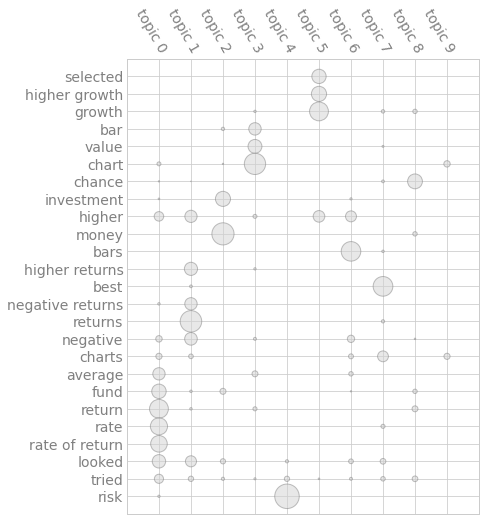

In [36]:
model.termite_plot(doc_topic_matrix, vectorizer.id_to_term,
                   topics=-1,  n_terms=25, sort_terms_by="seriation",save="study1Termite.jpg")

In [52]:
doc_topics = list(model.top_doc_topics(doc_topic_matrix=doc_topic_matrix,docs=-1,top_n=1))

In [45]:
topicTermsDict

{0: 'return , rate , rate of return , fund , looked',
 1: 'returns , higher returns , negative , negative returns , higher',
 2: 'money , investment , allocated , larger , highest return',
 3: 'chart , value , bar , bar chart , chart have high',
 4: 'risk , possible losses , decision , possible , losses',
 5: 'growth , higher growth , selected , higher , options',
 6: 'bars , higher bars , higher , negative bars , positive',
 7: 'best , charts , best rate , best growth best , growth best returns',
 8: 'chance , greater , balance , greater return , saw a greater',
 9: 'data , data and invite , invite further exploration , display , main functions'}

In [54]:
mid1["mid1_top_topic"] = [i[1][0] for i in doc_topics]

In [55]:
mid1

,usertoken,treatment,mid1,mid2,mid1_top_topic
0,bD48Dkqx,hops,I based it on the returns compared to each oth...,I watched for the higher rates of returns here.,1
1,eQFXhCnI,hops,Determined based on the bar chart.,Based on the orange line in the graph.,3
2,HnGQuT00,point,I can check the number of years and how much i...,I have to think number of years evaluation and...,3
3,Ks0A1NpT,barchart,It seemed like some funds had better returns t...,I used the same process/logic as before. The c...,1
4,M5LqR4zT,barchart,The rise in the bars based on their fluctuatio...,comparing the both chart the first one not giv...,6
...,...,...,...,...,...
193,N1Sd7DgS,barchart,I put the mouse over the percentages to observ...,I used the reasoning in the same way as before,9
194,bvD5GSTE,hopsdist,I tried to look how much I would be receiving ...,I saw if the orange bars were concentrated in ...,2
195,9ELOvUK7,barchart,First I looked to see which one would be more ...,I first assessed the average profitability of ...,0
196,J68xlxT0,density,look for current and past trends when making d...,"look at past, present, peaks, trends and decid...",7


In [56]:
mid1["mid1_top_topic_terms"] = mid1["mid1_top_topic"].apply(lambda x: topicTermsDict[x])

In [60]:
mid1.groupby(["mid1_top_topic"],as_index=False).agg({"usertoken":"nunique","mid1":"count",'mid1_top_topic_terms':"first"})

,mid1_top_topic,usertoken,mid1,mid1_top_topic_terms
0,0,51,51,"return , rate , rate of return , fund , looked"
1,1,30,30,"returns , higher returns , negative , negative..."
2,2,14,14,"money , investment , allocated , larger , high..."
3,3,18,18,"chart , value , bar , bar chart , chart have high"
4,4,13,13,"risk , possible losses , decision , possible ,..."
5,5,10,10,"growth , higher growth , selected , higher , o..."
6,6,13,13,"bars , higher bars , higher , negative bars , ..."
7,7,22,22,"best , charts , best rate , best growth best ,..."
8,8,6,6,"chance , greater , balance , greater return , ..."
9,9,21,21,"data , data and invite , invite further explor..."


In [63]:
for i in model.top_topic_docs(doc_topic_matrix=doc_topic_matrix,topics=-1,top_n=10):
  topic_id = i[0]
  top_terms = list(model.top_topic_terms(vectorizer.id_to_term, top_n=10,topics=topic_id))[0][1]
  print("topic", topic_id, ":", " , ".join(top_terms))
  for doc_id in i[1]:
    row = df.iloc[doc_id]
    print("****")
    print(row["mid1"])
  print("------------------------------------------------------------------")
  print("------------------------------------------------------------------")

topic 0 : return , rate , rate of return , fund , looked , average , higher , tried , possible , highest
****
i looked at the top rate of return and the average for each fund.
****
I looked at what the highest possible rate of return was, the lowest rate of return, and what the 'average' return would be between all 33 results. I also tried to narrow down by which fund had the fewest number of possible negative returns.
****
I used the charts to see which fund had the higher rate of return. I also saw which one had higher chances of loss.
****
I looked atthe charts to see which fund had the highest rate of return compared to the lowest risk. Over a long period of time the higher rate of return is worth the risk of loss.
****
I tried to balance risk a small amount but mostly looked at the average rate of return.
****
LOOKED AT THE LAST RESULTS, WHERE IS WAS SAID TO HAVE THE HIGHER RETURN RATE
****
I used the charts to see distribution of and best rate of return of each by looking at the 

# Round **2**

In [68]:
mid2 = df[df.mid2.notnull()]

In [69]:
corpus2 = textacy.corpus.Corpus(lang=en, data=list(mid2["mid2"]))

In [70]:


tokenized_docs = (doc._.to_terms_list(entities=False, as_strings=True, normalize = "lower") for doc in corpus2) #  
# do tf-idf
vectorizer = Vectorizer(norm="l2", apply_idf=True, max_df=0.95) # , vocabulary_terms = s, max_df=0.95, min_df=5, norm="l2", apply_idf=True, 
doc_term_matrix = vectorizer.fit_transform(tokenized_docs)
doc_term_matrix

<198x1778 sparse matrix of type '<class 'numpy.float64'>'
	with 3205 stored elements in Compressed Sparse Row format>

In [73]:
import textacy.tm

model = textacy.tm.TopicModel("nmf", n_topics=20)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
doc_topic_matrix.shape
topicTermsDict = {}
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=20):
    print("topic", topic_idx, ":", " , ".join(top_terms))
    topicTermsDict[topic_idx] = " , ".join(top_terms[:5])

topic 0 : returns , looked , negative returns , negative , compared , higher , tried , tried to invest , funds , highest , highest returns , higher returns , dots , invest , possible , chose the chart , checked , checked for higher , returns and tried , looked for negative
topic 1 : rate , rate of return , return , best , best return , return rate , best return rate , investment , place , period , charts , option , expected rate , find , try , best option , return is safer , possible rate , looked , investment period
topic 2 : green , dark green , dark , wanted the dark , wanted , went , highest , green zone , tried , zone , investments , investments in whichever , whichever was higher , green and tried , middle , whichever , dark green zone , positive , light green , light
topic 3 : average return , average , return , fund , higher , return over time , higher values , earnings , return with higher , visual , higher average return , higher average , average return dot , return dot , hi

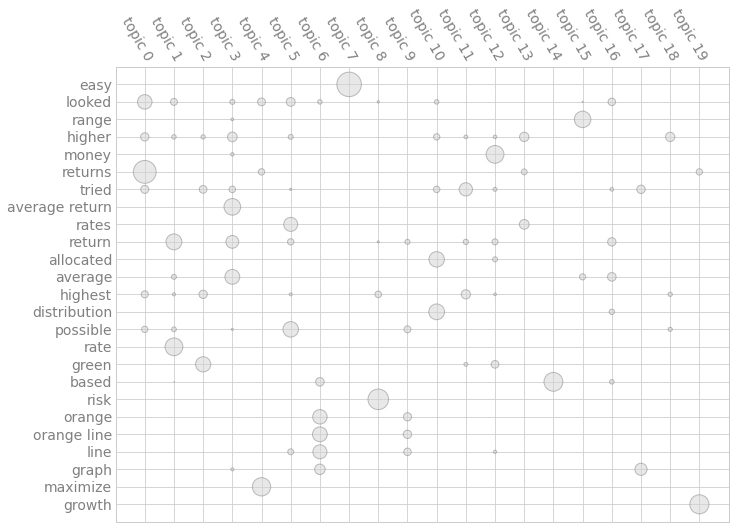

In [74]:
model.termite_plot(doc_topic_matrix, vectorizer.id_to_term,
                   topics=-1,  n_terms=25, sort_terms_by="seriation",save="study2Termite.jpg")

In [75]:
doc_topics = list(model.top_doc_topics(doc_topic_matrix=doc_topic_matrix,docs=-1,top_n=1))

In [76]:
topicTermsDict

{0: 'returns , looked , negative returns , negative , compared',
 1: 'rate , rate of return , return , best , best return',
 2: 'green , dark green , dark , wanted the dark , wanted',
 3: 'average return , average , return , fund , higher',
 4: 'maximize , maximize my investment , maximize returns , investment , chart',
 5: 'possible , rates , possible rates , rates of return , high',
 6: 'orange line , orange , line , graph , based',
 7: 'easy , zone , getting , future , future change',
 8: 'risk , thing , hedge the risk , hedge , highest',
 9: 'region , tended to flash , orange line tended , paid attention , flash',
 10: 'distribution , allocated , difficult , changed , tried',
 11: 'tried to look , look , tried , balance , highest percentage',
 12: 'money , invest , area , 2 charts , best chance',
 13: 'watched , higher rates , rates of returns , rates , higher',
 14: 'based , opinion , mmy decision , decision , period',
 15: 'range , range and choose , use the bars , bars to look ,

In [78]:
mid2["mid2_top_topic"] = [i[1][0] for i in doc_topics]

In [79]:
mid2

,usertoken,treatment,mid1,mid2,mid1_top_topic,mid2_top_topic
0,bD48Dkqx,hops,I based it on the returns compared to each oth...,I watched for the higher rates of returns here.,NaN,13
1,eQFXhCnI,hops,Determined based on the bar chart.,Based on the orange line in the graph.,NaN,6
2,HnGQuT00,point,I can check the number of years and how much i...,I have to think number of years evaluation and...,NaN,3
3,Ks0A1NpT,barchart,It seemed like some funds had better returns t...,I used the same process/logic as before. The c...,NaN,0
4,M5LqR4zT,barchart,The rise in the bars based on their fluctuatio...,comparing the both chart the first one not giv...,NaN,0
...,...,...,...,...,...,...
193,N1Sd7DgS,barchart,I put the mouse over the percentages to observ...,I used the reasoning in the same way as before,NaN,19
194,bvD5GSTE,hopsdist,I tried to look how much I would be receiving ...,I saw if the orange bars were concentrated in ...,NaN,6
195,9ELOvUK7,barchart,First I looked to see which one would be more ...,I first assessed the average profitability of ...,NaN,1
196,J68xlxT0,density,look for current and past trends when making d...,"look at past, present, peaks, trends and decid...",NaN,11


In [80]:
mid2["mid2_top_topic_terms"] = mid2["mid2_top_topic"].apply(lambda x: topicTermsDict[x])

In [83]:
mid2.groupby(["mid2_top_topic"],as_index=False).agg({"usertoken":"nunique","mid1":"count",'mid2_top_topic_terms':"first"})

,mid2_top_topic,usertoken,mid1,mid2_top_topic_terms
0,0,25,25,"returns , looked , negative returns , negative..."
1,1,31,31,"rate , rate of return , return , best , best r..."
2,2,9,9,"green , dark green , dark , wanted the dark , ..."
3,3,11,11,"average return , average , return , fund , higher"
4,4,7,7,"maximize , maximize my investment , maximize r..."
5,5,14,14,"possible , rates , possible rates , rates of r..."
6,6,8,8,"orange line , orange , line , graph , based"
7,7,3,3,"easy , zone , getting , future , future change"
8,8,11,11,"risk , thing , hedge the risk , hedge , highest"
9,9,2,2,"region , tended to flash , orange line tended ..."


In [86]:
for i in model.top_topic_docs(doc_topic_matrix=doc_topic_matrix,topics=-1,top_n=10):
  topic_id = i[0]
  top_terms = list(model.top_topic_terms(vectorizer.id_to_term, top_n=10,topics=topic_id))[0][1]
  print("topic", topic_id, ":", " , ".join(top_terms))
  for doc_id in i[1]:
    row = df.iloc[doc_id]
    print("****")
    print(row["mid2"])
    print(row["treatment"])
  print("------------------------------------------------------------------")
  print("------------------------------------------------------------------")

topic 0 : returns , looked , negative returns , negative , compared , higher , tried , tried to invest , funds , highest
****
I looked at the amount of returns and how they compared to each other. I looked at the amount of negative returns. 
barchart
****
I looked for negative returns, tried to invest less amount in such funds,
 Also checked for higher returns and tried to invest in them ,even though there was some negative returns.
table
****
I chose the chart with the highest returns. I looked where the dots were. 
dotplot
****
I looked at the amount of years of positive returns and how high a % the returns were to see which option I thought had higher ROI.
barchart
****
I compared to see which gave the best returns.
barchart
****
I compared the two charts to each other, to try and determine which would have the most possible high returns and least possible low returns.
hops
****
I choose to select the allocation based on the probability of higher expected returns given the distribut

In [91]:
g = mid2.groupby(["treatment","mid2_top_topic"],as_index=False).agg({"usertoken":"nunique",'mid2_top_topic_terms':"first"})

In [92]:
g[g["treatment"]=="density"]

,treatment,mid2_top_topic,usertoken,mid2_top_topic_terms
11,density,0,4,"returns , looked , negative returns , negative..."
12,density,4,2,"maximize , maximize my investment , maximize r..."
13,density,5,2,"possible , rates , possible rates , rates of r..."
14,density,6,1,"orange line , orange , line , graph , based"
15,density,7,2,"easy , zone , getting , future , future change"
16,density,8,1,"risk , thing , hedge the risk , hedge , highest"
17,density,11,1,"tried to look , look , tried , balance , highe..."
18,density,12,3,"money , invest , area , 2 charts , best chance"
19,density,14,3,"based , opinion , mmy decision , decision , pe..."
20,density,16,1,"mean , mean return , thought , average , return"
